In [2]:
import pandas as pd
import numpy as np
import io

In [3]:
from google.colab import files
uploaded = files.upload()
df=pd.read_csv(io.BytesIO(uploaded['cereal.csv']))

Saving cereal.csv to cereal.csv


In [4]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [5]:
df.tail()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193
76,Wheaties Honey Gold,G,C,110,2,1,200,1.0,16.0,8,60,25,1,1.0,0.75,36.187559


In [6]:
df.shape

(77, 16)

In [7]:
data=df.drop(['name'], axis=1)

In [8]:
print(set(data['shelf']))

{1, 2, 3}


In [9]:
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder(); 

In [10]:
x=data.iloc[:,:-1].values #all data except rating col.
y=data.iloc[:,-1].values #only rating col #data to numpy array

In [11]:
data.isnull().sum() #count missing values

mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [12]:
for i in range(0,2):
  x[:,i]=lc.fit_transform(x[:,i])
  #label encoer encodes non=numerical data

In [13]:
from scipy.stats import pearsonr

In [14]:
correlation=[]
for i in range(len(data.columns)-1):
  col_x=x[:,i]
  col_y=y
  corr,_=pearsonr(col_x, col_y)
  correlation.append(corr)
  print(corr)

0.1409424083755429
0.20302370742156076
-0.6893760311652588
0.47061846454925926
-0.40928366014780976
-0.40129520449484846
0.5841604199515842
0.0520546612337646
-0.7596746584301075
0.38016536869410067
-0.24054361076908157
0.025158815679116875
-0.2981239849779472
-0.20316006300817877


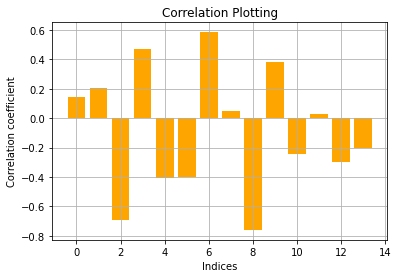

In [15]:
import matplotlib.pyplot as plt
plt.title('Correlation Plotting')
plt.bar([i for i in range(14)], correlation, color='orange')
plt.xlabel('Indices')
plt.ylabel('Correlation coefficient')
plt.grid()

In [16]:
#Seggregating columns index to drop
index=[]
for i in range(14):
  if correlation[i] <= 0.29 and correlation[i] >= -0.29:
    index.append(i)
index 

[0, 1, 7, 10, 11, 13]

In [26]:
#Segregating columns to drop later
drop_col=[]
for i in index:
  print(data.columns[i])
  drop_col.append(data.columns[i])
drop_col

mfr
type
carbo
vitamins
shelf
cups


['mfr', 'type', 'carbo', 'vitamins', 'shelf', 'cups']

In [27]:
data = data.drop(drop_col,axis=1)
data.head()

,calories,protein,fat,sodium,fiber,sugars,potass,weight,rating
0,70,4,1,130,10.0,6,280,1.0,68.402973
1,120,3,5,15,2.0,8,135,1.0,33.983679
2,70,4,1,260,9.0,5,320,1.0,59.425505
3,50,4,0,140,14.0,0,330,1.0,93.704912
4,110,2,2,200,1.0,8,-1,1.0,34.384843


In [29]:
x= data.iloc[:,:-1].values
x

array([[ 70.  ,   4.  ,   1.  , 130.  ,  10.  ,   6.  , 280.  ,   1.  ],
       [120.  ,   3.  ,   5.  ,  15.  ,   2.  ,   8.  , 135.  ,   1.  ],
       [ 70.  ,   4.  ,   1.  , 260.  ,   9.  ,   5.  , 320.  ,   1.  ],
       [ 50.  ,   4.  ,   0.  , 140.  ,  14.  ,   0.  , 330.  ,   1.  ],
       [110.  ,   2.  ,   2.  , 200.  ,   1.  ,   8.  ,  -1.  ,   1.  ],
       [110.  ,   2.  ,   2.  , 180.  ,   1.5 ,  10.  ,  70.  ,   1.  ],
       [110.  ,   2.  ,   0.  , 125.  ,   1.  ,  14.  ,  30.  ,   1.  ],
       [130.  ,   3.  ,   2.  , 210.  ,   2.  ,   8.  , 100.  ,   1.33],
       [ 90.  ,   2.  ,   1.  , 200.  ,   4.  ,   6.  , 125.  ,   1.  ],
       [ 90.  ,   3.  ,   0.  , 210.  ,   5.  ,   5.  , 190.  ,   1.  ],
       [120.  ,   1.  ,   2.  , 220.  ,   0.  ,  12.  ,  35.  ,   1.  ],
       [110.  ,   6.  ,   2.  , 290.  ,   2.  ,   1.  , 105.  ,   1.  ],
       [120.  ,   1.  ,   3.  , 210.  ,   0.  ,   9.  ,  45.  ,   1.  ],
       [110.  ,   3.  ,   2.  , 140.  ,   2.  ,   7

In [30]:
#Train test splitting
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [31]:
#Fitting the data according to model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
regressor.score(x_test, y_test) #no reglarization needed

0.8952898200886954

In [23]:
y_pred=regressor.predict(x_test)

In [24]:
y_pred

array([53.31381286, 29.92428522, 59.36399345, 18.04285089, 33.9836792 ,
       40.44877252, 53.13132324, 23.8040431 , 52.07689653, 49.78744507,
       41.01549164, 30.31335103, 35.25244365, 37.03856172, 30.45084342,
       36.1761962 ])

In [34]:
#if regularization needed i.e if score is > 90-95
from sklearn.linear_model import Ridge
ridge_req_1 = Ridge(alpha=1, normalize=True)  #alpha=1
ridge_req_1.fit(x_train, y_train)
ridge_req_1.score(x_test, y_test)

0.828318112475621

In [35]:
from sklearn.linear_model import Ridge
ridge_req_05 = Ridge(alpha=0.5, normalize=True)  #alpha=0.5
ridge_req_05.fit(x_train, y_train)
ridge_req_05.score(x_test, y_test)

0.8839210106644021

In [36]:
from sklearn.linear_model import Ridge
ridge_req_2 = Ridge(alpha=2, normalize=True)  #alpha=2
ridge_req_2.fit(x_train, y_train)
ridge_req_2.score(x_test, y_test)

0.7025269280832254